In [27]:
# ioSoyPato librarie
%run ioSoyPato.ipynb

<div style="background: linear-gradient(to right, #FF6699, #66CCFF); border: 1px solid #000000; padding: 10px; text-align: center;">
    <h1>Linear Algebra final project</h1>
    <h3>Solution of systems of equations $Ax=b$</h3>
</div>

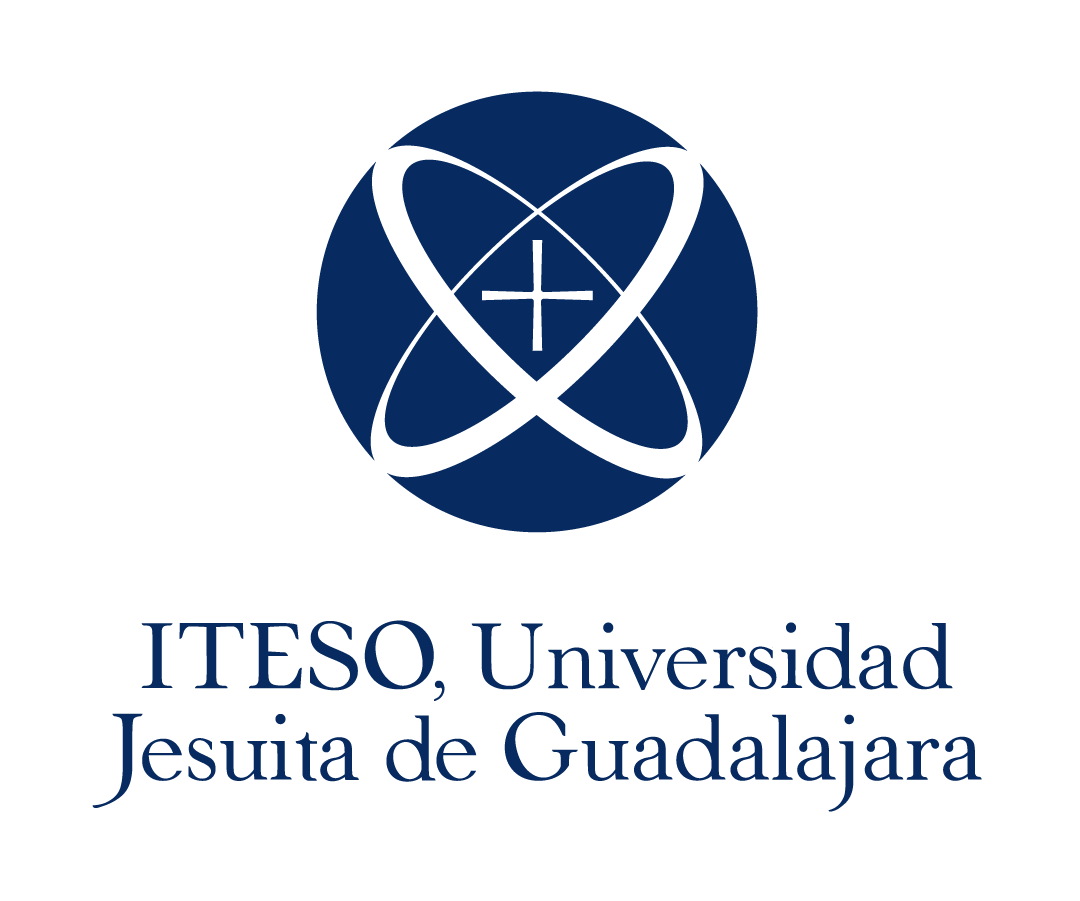

# <font color= #8A0829> System of National Accounts of Mexico </font>
#### <font color= #2E9AFE> __Mexico Input-Output Matrix 2003__</font>
<Strong> Team Members:</Strong>
- <Strong>Patricio Adulfo Villanueva Gio</Strong>
- <Strong>Dafne Tamayo Leon</Strong>
- <Strong>Maria Paula Perez Romo</Strong>
- <Strong>Melanie Michelle</Strong>

 <font color= green> topic: solution of the system of equations by gaussian and iterative methods </font>
 
 

We import the libraries for warning control and for comparing the function models.

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import time

We create the basic functions that will later be used to calculate results in the differebt methods

the basic functions we created were
- Identity generator
- Swap rows
- Multiply rows
- Inverse matrix
- Create the zero vector
- Calculate the dot product of two vectors
- substract matrices


Remember that we start from a system of equations of the form:
$$ Ax=b$$

This means that $A$ will be our matrix of coefficients, $B$ our vector of results and $X$ our vector of unknowns or variables.

In [3]:
# Matrix A, B, and Identity
A = pd.read_excel('Matriz_insumo.xlsx')
A = A.values
b = pd.read_excel('Demanda_final.xlsx')
b = b.values

# Create the identity matrix same len as A and b
I = identity(len(A)) # ioSoyPato librarie function

Normalization. This code normalizes by dividing each column of each row by its value in the last column, so that the matrix 

\begin{bmatrix}
2 & 4 & 8 \\
3 & 6 & 9 \\
2 & 4 & 10 \\
\end{bmatrix}

would look like this after normalization


\begin{bmatrix}
0.25 & 0.5 & 1 \\
0.33 & 0.66 & 1 \\
0.2 & 0.4 & 1 \\
\end{bmatrix}



In [4]:
aug_matrix = augmented_matrix(A, b)
normalized_matrix = p_linalg_normalize(aug_matrix)

A,b = A_and_b(normalized_matrix) #ioSoyPato_linalgebra librarie function

 $$ \vec x  =  (I-C)^{-1}  \vec d $$

In [5]:
# Start measuring the execution time
start = time.time()

# Calculate the Leontief inverse by subtracting matrix A from the identity matrix I
IC = subtract(I,A) # ioSoyPato librarie function

# Use NumPy's linear algebra inverse function to find the inverse of the Leontief matrix
leontief = p_linalg_inv(IC) # ioSoyPato_linalgebra librarie function

# Calculate the solution X by multiplying the Leontief inverse with the demand vector b
X = p_linalg_dot(leontief, b) # ioSoyPato_linalgebra librarie function

# Stop measuring the execution time
end = time.time()

In [6]:
# Iterate over the elements of X along with their indices
for i, x in enumerate(X):
    # Print the solution for each variable in the system
    print(f'x{i + 1} = {x}')

x1 = -54.55870190154373
x2 = 5.184821047151649
x3 = -0.9634533429614972
x4 = 2.8263197394942536
x5 = 1.730210685428757
x6 = -1.113776790572505
x7 = -2.6807877860859244
x8 = -354.4572992570676
x9 = -2.182445234900871
x10 = 10.66667794896592
x11 = -73.99157904163324
x12 = -9.252283103010651
x13 = -47.392118712683505
x14 = 42.74172955257262
x15 = 12.671417590792739
x16 = 302.1626249971192
x17 = 44.662384270229545
x18 = 9.61110981513422
x19 = -5.265058728247094
x20 = 0.7361723261938491


In [7]:
# Print the elapsed time for the calculations
print("Time:", end - start)

Time: 0.009307384490966797


Gauss method

In [8]:
# Start measuring the execution time
start = time.time()

# Call the Gauss function to solve the system of linear equations using Gaussian elimination
Gauss(IC, b) # ioSoyPato librarie function

# Stop measuring the execution time
end = time.time()

In [9]:
# Iterate over the solutions obtained from Gaussian elimination along with their indices
for i, x in enumerate(Gauss(IC, b)):
    # Print each variable's solution
    print(f'x{i + 1} = {x}')

x1 = -54.55870190143704
x2 = 5.184821047136282
x3 = -0.9634533429454005
x4 = 2.826319739480109
x5 = 1.7302106854229193
x6 = -1.1137767905691625
x7 = -2.680787786072362
x8 = -354.45729925394625
x9 = -2.182445234918078
x10 = 10.666677948875574
x11 = -73.99157904131651
x12 = -9.252283103208132
x13 = -47.392118711992886
x14 = 42.74172955204006
x15 = 12.671417590943662
x16 = 302.16262499707074
x17 = 44.66238426994634
x18 = 9.611109815231972
x19 = -5.265058728239038
x20 = 0.7361723261907906


In [10]:
# Print the elapsed time for the Gaussian elimination process
print('Time:', end - start)

Time: 0.0030646324157714844


# Iterative Methods

Iterative methods to find the solution for the system of equations $Ax=b$.

Jacobi's method: To solve by Jacobi's method we must clear the i-th variable of the i-th equation. 

We create the necesary functions to apply Jacobi's method

functions:
- Initialize vectors 
- Calculate the sum of the terms
- Update x
- Check convergence
- Jacobi solver

In [11]:
jacobi(A,b) # ioSoyPato librarie function

'The Jacobi method does not converge within the maximum number of iterations.'

As we can see the matrix does not converge but we must then check if the matrix is diagonally dominant.

Now we create funcions that allow us to make the augmented matrix of the system and then make it strictly dominant. Once this was done we had to create another function to return  the matrices into the form $A$ and $b$

In [12]:
A = A.tolist()
b = b.tolist()

In [13]:
# Create the augmented matrix by concatenating the coefficient matrix A and the constant vector b
result_matrix = augmented_matrix(A, b) # ioSoyPato librarie function

# Make the augmented matrix diagonally dominant
dominant_matrix = dominant(result_matrix) # ioSoyPato librarie function

# Check if the matrix is diagonally dominant in the real sense (True / False)
is_real_dominant = real_dominant(dominant_matrix) # ioSoyPato librarie function

In [14]:
A,b = A_and_b(dominant_matrix)

start = time.time()
jacobi(A,b) # ioSoyPato librarie function
end = time.time()

In [15]:
# Iterate over the solutions obtained from the Jacobi method along with their indices
for i, x in enumerate(jacobi(A, b)):
    # Print each variable's solution
    print(f'x{i + 1} = {x}')

x1 = -0.08535854185625866
x2 = 0.08883423509146059
x3 = -0.11412857228724162
x4 = -0.14484870592067425
x5 = 0.16282335839542597
x6 = 0.03523524186794825
x7 = 0.018780509723309316
x8 = -0.07914237101154743
x9 = -0.05984710863694633
x10 = -0.06470602309945744
x11 = -0.096787915558013
x12 = -0.09363686066315866
x13 = -0.11314965413445281
x14 = -0.08225191925706309
x15 = -0.06174903492958636
x16 = -0.05587146522111708
x17 = -0.10053341985580591
x18 = -0.06209093177004555
x19 = -0.07460397710169395
x20 = 0.16808428290682387


Time elapsed

In [16]:
# Print the elapsed time for the Jacobi method
print('Time:', end - start)

Time: 0.15242242813110352


Gauss Seidel method

In [17]:
start = time.time()
gauss_seidel_solver(A,b) # ioSoyPato librarie function
end = time.time()

In [18]:
# Iterate over the solutions obtained from the Gauss-Seidel method along with their indices
for i, x in enumerate(gauss_seidel_solver(A,b)):
    # Print each variable's solution
    print(f'x{i + 1} = {x}')

x1 = -0.08282471815894657
x2 = 0.09065878217071074
x3 = -0.11081517131398469
x4 = -0.14164693784085636
x5 = 0.16467735607506104
x6 = 0.03765307551799513
x7 = 0.0213347937361634
x8 = -0.07546500268910891
x9 = -0.05644991752674279
x10 = -0.0615620264817956
x11 = -0.09330516245890395
x12 = -0.09018438361477842
x13 = -0.10974769432307799
x14 = -0.07875248573543209
x15 = -0.05775021905866053
x16 = -0.05174905971186678
x17 = -0.0970448028778993
x18 = -0.0588451184774583
x19 = -0.07099644081451917
x20 = 0.1701478716556479


Time elapsed

In [19]:
# Print the elapsed time for the Gauss-Seidel method
print('Time:', end - start)

Time: 0.003937244415283203


__As we can see Gauss-Seidel was way faster :)__